## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [14]:
train, test = keras.datasets.cifar10.load_data()

In [25]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [26]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [27]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [35]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.01
EPOCHS = 20
BATCH_SIZE = 128
MOMENTUM = [0.01, 0.7, 0.9, 0.99, 0.2]

In [36]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with LR = {lr:.4f}, MOMENTUM = {momentum}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    opt = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum) # 使用 nesterov
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train, 
              y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = f"exp-lr-{lr}-momemtum-{momentum}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.1000, MOMENTUM = 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [=============

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 165us/step - loss: 2.0754 - acc: 0.2259 - val_loss: 1.9015 - val_acc: 0.2965
Epoch 2/20
50000/50000 [==============================] - 8s 153us/step - loss: 1.8845 - acc: 0.3112 - val_loss: 1.8840 - val_acc: 0.3227
Epoch 3/20
50000/50000 [==============================] - 8s 157us/step - loss: 1.8269 - acc: 0.3379 - val_loss: 1.8116 - val_acc: 0.3359
Epoch 4/20
50000/50000 [==============================] - 8s 156us/step - loss: 1.7775 - acc: 0.3535 - val_loss: 1.7975 - val_acc: 0.3436
Epoch 5/20
50000/50000 [==============================] - 8s 166us/step - loss: 1.7513 - acc: 0.3682 - val_loss: 1.7883 - val_acc: 0.3611
Epoch 6/20
50000/50000 [==============================] - 8s 165us/step - loss: 1.7327 - acc: 0.3758 - val_loss: 1.8420 - val_acc: 0.3275
Epoch 7/20
50000/50000 [==============================] - 8s 165us/step - loss: 1.7169 - acc: 0.3840 - val_loss: 1.8678 - 

50000/50000 [==============================] - 7s 146us/step - loss: 1.6834 - acc: 0.3952 - val_loss: 1.6968 - val_acc: 0.3734
Epoch 4/20
50000/50000 [==============================] - 8s 156us/step - loss: 1.6092 - acc: 0.4244 - val_loss: 1.6802 - val_acc: 0.3957
Epoch 5/20
50000/50000 [==============================] - 7s 147us/step - loss: 1.5554 - acc: 0.4445 - val_loss: 1.6110 - val_acc: 0.4237
Epoch 6/20
50000/50000 [==============================] - 8s 156us/step - loss: 1.5097 - acc: 0.4585 - val_loss: 1.5867 - val_acc: 0.4310
Epoch 7/20
50000/50000 [==============================] - 7s 146us/step - loss: 1.4730 - acc: 0.4731 - val_loss: 1.5858 - val_acc: 0.4271
Epoch 8/20
50000/50000 [==============================] - 8s 151us/step - loss: 1.4441 - acc: 0.4842 - val_loss: 1.5340 - val_acc: 0.4515
Epoch 9/20
50000/50000 [==============================] - 7s 147us/step - loss: 1.4072 - acc: 0.4980 - val_loss: 1.5230 - val_acc: 0.4615
Epoch 10/20
50000/50000 [====================

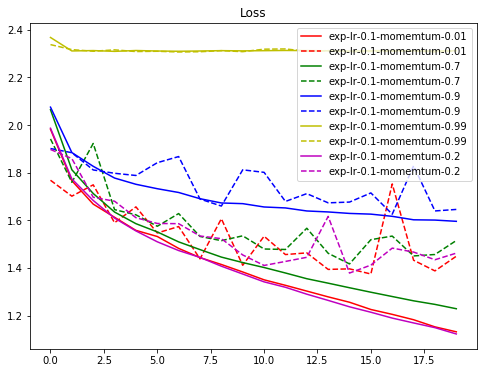

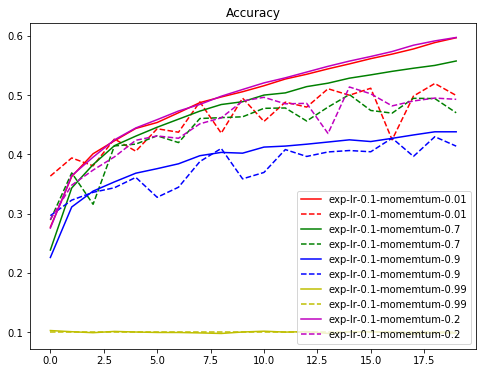

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()